# Improving maps with Cartopy

[Cartopy](http://scitools.org.uk/cartopy/) is a library for creating plots on maps. We can use it to improve Xarray's plots (see [plotting basics]({{ site.baseurl }}{% link _posts/2018-04-19-plotting-basics.md %}) for the basics of Xarray plotting)

Let's load the data we used in the last page, surface temperature for the ACCESS1.0 AMIP run March 1984:

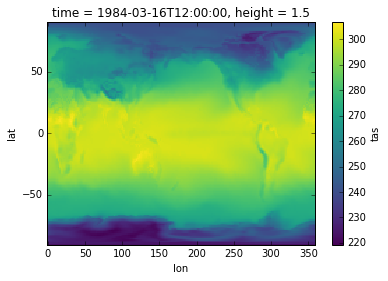

In [1]:
%matplotlib inline
import xarray
datapath = "http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-0/amip/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-0_amip_r1i1p1_197901-200812.nc"
data = xarray.open_dataset(datapath)
surface_temp_slice = data.tas.sel(time = '1984-03')
surface_temp_slice.plot()

## Projections

Cartopy is based around projecting the data in different ways. To use it, we create an axis with a specific projection, then add plots onto that axis.

Note that we don't need to tell the plot command about our co-ordinates, Xarray does that automatically for us

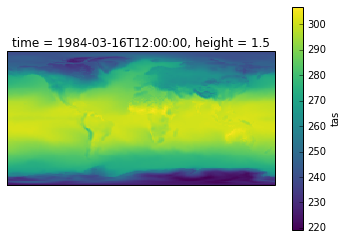

In [20]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())

surface_temp_slice.plot(ax=ax)

Cartopy has a bunch of [different projections](http://scitools.org.uk/cartopy/docs/latest/crs/projections.html) that you can use.

If the data is in a different projection to the axis it's important to give a `transform` to `plot()`. Our data is on a lat-lon grid, so we need to tell Cartopy to transform it from a `PlateCarree` projection to `LambertConfromal`

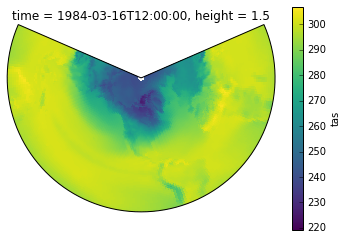

In [22]:
ax = plt.axes(projection=ccrs.LambertConformal())

surface_temp_slice.plot(ax=ax, transform=ccrs.PlateCarree())

Cartopy also has some helper functions for showing coastlines etc., which can make it easier to interpret a plot. These work regardless of what projection you are using

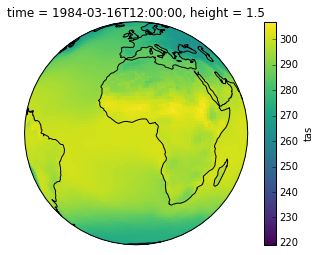

In [29]:
ax = plt.axes(projection=ccrs.Orthographic())

surface_temp_slice.plot(ax=ax, transform=ccrs.PlateCarree())

ax.coastlines()

To restrict the plot's domain you can use `ax.set_extent()`:

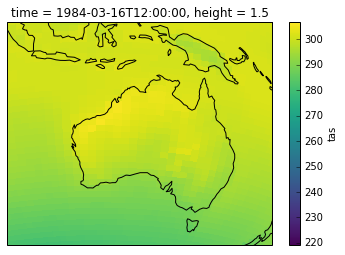

In [33]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.NearsidePerspective(central_latitude=-20, central_longitude=120))

surface_temp_slice.plot(ax=ax, transform=ccrs.PlateCarree())

ax.coastlines()
ax.set_extent([100,160,-45,0])